In [57]:
%matplotlib inline

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

sns.set_style("whitegrid")

pd.set_option('display.max_columns',150) # Para poder visualizar todas las columnas

dataset = pd.read_csv("./datasets/responses.csv", sep=",")

sns.set(rc={'figure.figsize':(12, 8)})


In [6]:
dataset.shape


(1010, 150)

In [7]:
dataset.Smoking.describe()

count              1002
unique                4
top       tried smoking
freq                430
Name: Smoking, dtype: object

In [8]:
dataset.Alcohol.describe()

count               1005
unique                 3
top       social drinker
freq                 659
Name: Alcohol, dtype: object

### El socio vicio

"Nunca volveré a fumar", "Solo lo probaré", "yo puedo controlarlo", ideas erroneas que empujan a gran parte de los jovenes al tabaquismo.
La addición al tabaco tiene componententes fisiológicos, psicológicos y sociales. El cigarrillo actua en un comienzo como una trampa. Desde nuestra más tierna infancia, recibimos a través del subconsciente
un bombardeo diario de información. Nos dice que el tabaco nos relajará, nos dará valor y confianza en nosotros mismos, y que el placer más apreciado del planeta es un cigarrillo. ¿exagero? En muchas películas, dibujos animados, una obra de teatro o en la televisión en una escena en la que una persona está a punto de morir, ¿no solicita a caso un cigarrillo?. El efecto de esta imagen no se siente en la mente, pero en el subconciente esta dejando un mensaje muy marcado. El contenido real del mensaje es: **"Cuando yo muera,
mi último pensamiento, mi última acción será lo que más valor tiene en la vida:
fumarme un cigarrillo.**" En las películas de guerra, al héroe herido siempre le dan un cigarrillo.
En la sociedad misma, el cigarrillo esta visto por los jovenes como un modo de parecer adultos, interesantes, y como un simboloi de rebeldia.

En reuniones sociales es en donde la trampa del cigarrillo suele tener mayor efectividad. Sumado a la imagen social que uno tiene almacenada en el subcociente sobre el cigarrillo el consumo de bebidas alcoholicas nos empuja muchas veces a animarnos a probar. 

Entonces, ¿La prohibición de fumar en bares podría ser una buena medida en ayudar a que menos gente fume?
 
Un estudio realizado entre jovenes eslovacos de entre 15 y 30 años nos muestra que un 43% han probado el tabaco y aproximadamente 36% son fumadores. Tambien que un 65.8% de los jovenes son bebedores sociales y un 22% bebe mucho.

Pero para poder responder esta pregunta miraremos un poco más de cerca los datos.

In [9]:
dataset_smoke = dataset.Smoking.value_counts(normalize=True)
dataset_smoke

tried smoking     0.429142
never smoked      0.207585
current smoker    0.188623
former smoker     0.174651
Name: Smoking, dtype: float64

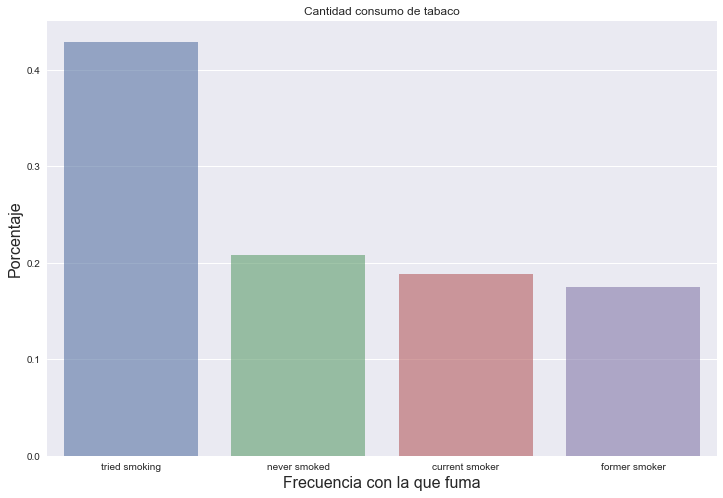

In [10]:
sns.barplot(dataset_smoke.index, dataset_smoke.values, alpha=0.6)
plt.title('Cantidad consumo de tabaco')
plt.ylabel('Porcentaje', fontsize=16)
plt.xlabel('Frecuencia con la que fuma', fontsize=16)
plt.show()

In [11]:
dataset_alc = dataset.Alcohol.value_counts(normalize=True)
dataset_alc

social drinker    0.655721
drink a lot       0.220896
never             0.123383
Name: Alcohol, dtype: float64

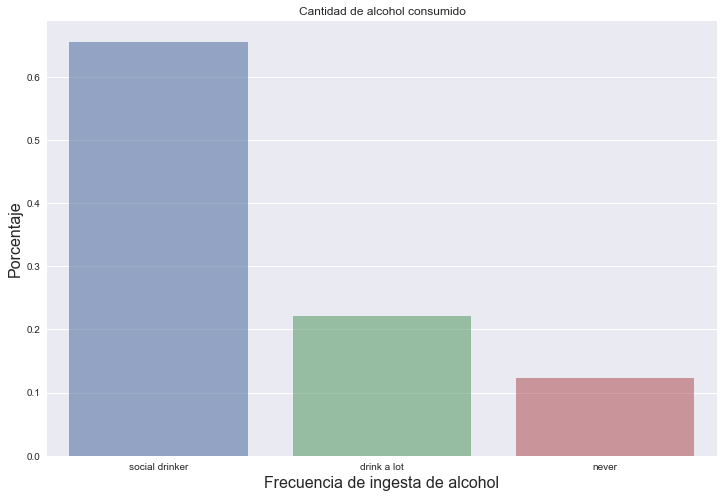

In [12]:
sns.barplot(dataset_alc.index, dataset_alc.values, alpha=0.6)
plt.title('Cantidad de alcohol consumido')
plt.ylabel('Porcentaje', fontsize=16)
plt.xlabel('Frecuencia de ingesta de alcohol', fontsize=16)
plt.show()

**del 43% que han probado fumar alguna vez, un 20% lo han hecho antes de los 19 años, y un 87.6% antes de cumplir 23. La media de los jovenes han probado el cigarrillo al cumplir 21 años.**

**Tambien vemos que 65.8% de jovenes que beben socialmente un 21.5% lo han hecho antes de los 19 años y un 84% antes de cumplir 23 años. La media de jovenes que beben socialmente se encuentra alrededor de los 20 años**

**Si bien parece haber una relación entre beber y fumar aún no se puede afirmar nada**

**del 43% que han probado fumar alguna vez, un 20% lo han hecho antes de los 19 años, y un 87.6% antes de cumplir 23. La media de los jovenes han probado el cigarrillo al cumplir 21 años.**

**Tambien vemos que 65.8% de jovenes que beben socialmente un 21.5% lo han hecho antes de los 19 años y un 84% antes de cumplir 23 años. La media de jovenes que beben socialmente se encuentra alrededor de los 20 años**

**Si bien parece haber una relación entre beber y fumar aún no se puede afirmar nada**

In [24]:
tried_smoke_by_age = dataset[dataset["Smoking"]=="tried smoking"]
fdp_tried_smoke_by_age = tried_smoke_by_age.Age.value_counts(normalize=True).reset_index()

# Renombrar las columnas
column_names = {"index":"Age", "Age": "fdp"}
fdp_tried_smoke_by_age = fdp_tried_smoke_by_age.rename(index=str, columns=column_names)

# descomentar la siguiente linea para ordenar por año
fdp_tried_smoke_by_age = fdp_tried_smoke_by_age.sort_values(by="Age")


0.8764568764568765

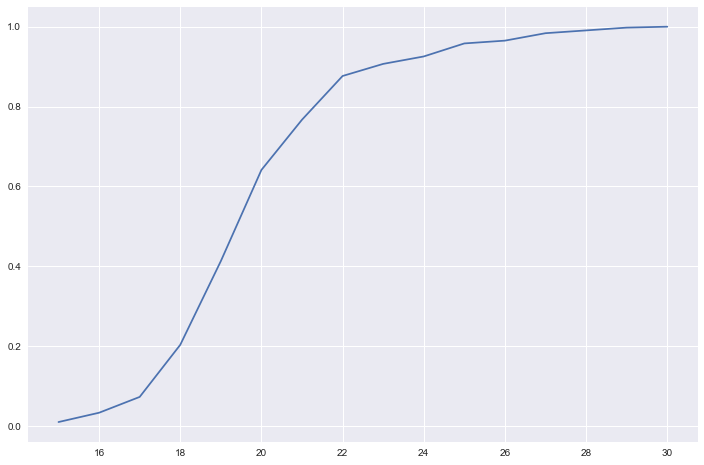

In [25]:
fda = fdp_tried_smoke_by_age.cumsum(axis=0)["fdp"]

age = fdp_tried_smoke_by_age.Age

# DataFrame con años y fda
fda_per_age = pd.DataFrame({'age': age,'fda':fda});

plt.plot(fda_per_age["age"],fda_per_age["fda"]);

fda_18 = fda_per_age.loc[fda_per_age["age"] == 18]["fda"].values[0]
fda_19 = fda_per_age.loc[fda_per_age["age"] == 19]["fda"].values[0]
fda_20 = fda_per_age.loc[fda_per_age["age"] == 20]["fda"].values[0]
fda_21 = fda_per_age.loc[fda_per_age["age"] == 21]["fda"].values[0]
fda_22 = fda_per_age.loc[fda_per_age["age"] == 22]["fda"].values[0]

fda_22


In [26]:
tried_smoke_by_age.Age.mean()

20.25874125874126

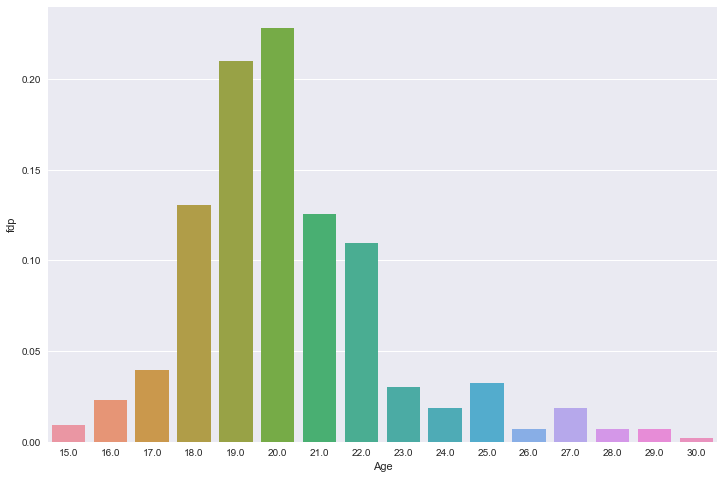

In [31]:
sns.barplot(data=fdp_tried_smoke_by_age, x="Age", y="fdp");


In [32]:
social_drink_by_age = dataset[dataset["Alcohol"]=="social drinker"]
fdp_social_drink_by_age = social_drink_by_age.Age.value_counts(normalize=True).reset_index()

# Renombrar las columnas
column_names = {"index":"Age", "Age": "fdp"}
fdp_social_drink_by_age = fdp_social_drink_by_age.rename(index=str, columns=column_names)

# descomentar la siguiente linea para ordenar por año
fdp_social_drink_by_age = fdp_social_drink_by_age.sort_values(by="Age")

0.8442748091603053

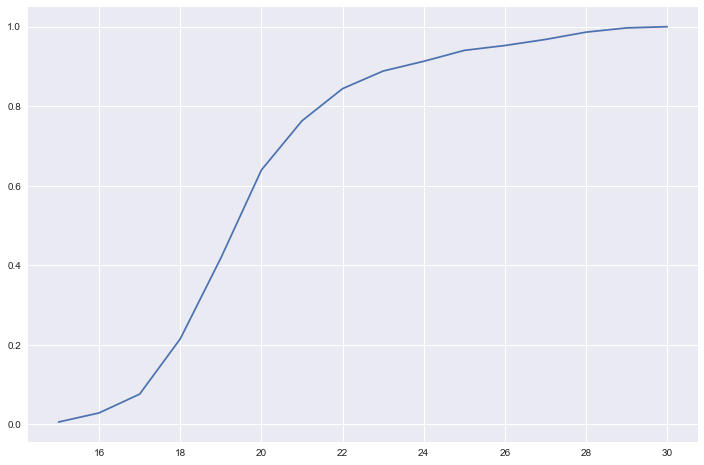

In [33]:
fda = fdp_social_drink_by_age.cumsum(axis=0)["fdp"]

age = fdp_social_drink_by_age.Age

# DataFrame con años y fda
fda_per_age = pd.DataFrame({'age': age,'fda':fda});

plt.plot(fda_per_age["age"],fda_per_age["fda"]);

fda_18 = fda_per_age.loc[fda_per_age["age"] == 18]["fda"].values[0]
fda_19 = fda_per_age.loc[fda_per_age["age"] == 19]["fda"].values[0]
fda_20 = fda_per_age.loc[fda_per_age["age"] == 20]["fda"].values[0]
fda_21 = fda_per_age.loc[fda_per_age["age"] == 21]["fda"].values[0]
fda_22 = fda_per_age.loc[fda_per_age["age"] == 22]["fda"].values[0]

fda_22

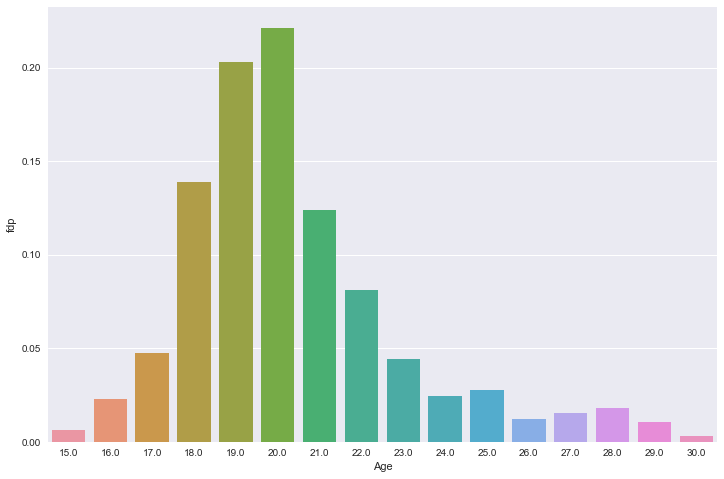

In [34]:
sns.barplot(data=fdp_social_drink_by_age, x="Age", y="fdp");


In [35]:
social_drink_by_age.Age.mean()

20.361832061068704

**Evaluando las probabilidades conjuntas entre las variables consumo de alcohol y fumar tabaco observamos que no existe una estrecha relación entre los fumadores y la gente que consume alcohol regularmente, pero observemos más de cerca la relación entre los jovenes que beben socialmente y han probado el cigarrillo. Vemos que existe una probabilidad conjunta del caso 32% de que un joven pruebe un cigarrillo y consuma alcohol ocasionalmente.**

**Si bien este número no suena raro ya que los jovenes, como comentamos anteriormente, realizan este tipo de actividades como experimentación o como una forma de mostrarse socialmente**

**Para poder responder nuestra pregunta, veamos que probabilidad hay de que siendo un bebedor social se pruebe un cigarrillo**

In [36]:
p_x_and_y = pd.crosstab(dataset.Alcohol, dataset.Smoking, normalize=True, dropna=True)

p_x_and_y

Smoking,current smoker,former smoker,never smoked,tried smoking
Alcohol,,,,
drink a lot,0.078,0.055,0.015,0.072
never,0.011,0.011,0.061,0.039
social drinker,0.099,0.109,0.131,0.319


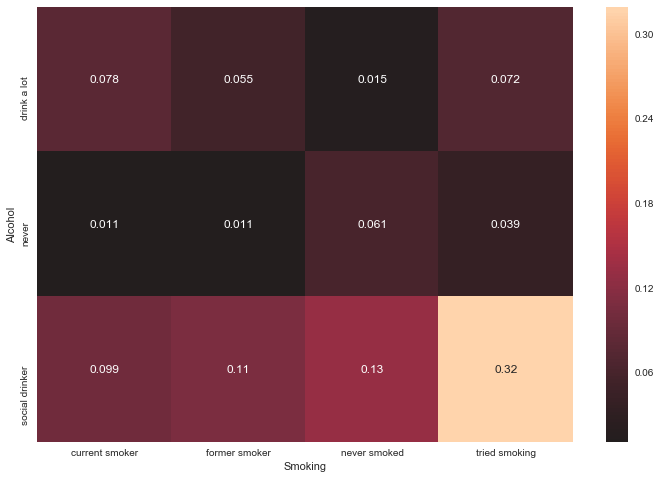

In [37]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.heatmap(p_x_and_y, annot=True, center=0);

In [38]:
# Para calcular probabilidad conjunta P (N/M) utilizaremos: P(N∧M)/P(M)
# Primero calcularemos P(M)

dataset_social_drinker = dataset[dataset["Alcohol"]=="social drinker"]

# Filtramos casos que no hubo violencia fisica y valores NaN

tabla_social_drinker = dataset_social_drinker.dropna(subset=['Alcohol'])


total_social_drinker = len(tabla_social_drinker)
total_casos = len(dataset)

p_m = total_social_drinker / float(total_casos)


print("P(M): {}".format(p_m))

P(M): 0.6524752475247525


In [39]:
# Ahora calculamos P(N∧M)

# Filtramos valores NaN

total_casos = len(dataset)

social_drink_by_age = social_drink_by_age.dropna(subset=["Alcohol"])

tabla_drink_smoke = social_drink_by_age.dropna(subset=["Smoking"])

tabla_drink_smoke = tabla_drink_smoke[tabla_drink_smoke.Smoking == "tried smoking"]

total_drink_smoke = len(tabla_drink_smoke)

p_n_and_m = total_drink_smoke / float(total_casos)

print("P(N∧M)): {}".format(p_n_and_m))



P(N∧M)): 0.31584158415841584


In [40]:

# Ahora podemos calcular P (N/M) = P(N∧M)/P(M)

P_n_m = p_n_and_m / p_m

print("P(N/M)): {}".format(P_n_m))


P(N/M)): 0.4840667678300455


**Observamos que hay un 48.4% de probabilidad que siendo un bebedor social se pruebe el cigarrillo**

**¿La prohibición de fumar en bares podría ser una buena medida en ayudar a que menos gente fume?**

**Por lo evaluado no se puede afirmar que sea una medida efectiva para bajar la cantidad de fumadores actual, pero si puede ser una medida efectiva para prevenir la aparición de nuevos fumadores, producto de probar el cigarrillo, con lo cual prohibiendo fumar en ambitos sociales comunes, donde exista la presencia de alcohol como los bares, restaurantes, boliches, etc. Se podría evitar la proliferación de fumadores**

### Prueba de independencia de chi cuadrado

Paso 1:
Hipotesis nula (H0): Probar el cigarrillo es independiente de si una persona consume alcohol.
Hipotesis alternativa (H1): Probar el cigarrillo esta relacionado con el consumo de alcohol
    
Paso 2: 
    alpha = 0.05 --> con una confianza del 95%
    
Paso 3:
Encontrar valores criticos y de prueba

chi_cuadrada_critica (grados de libertad, alpha)

grados de libertad = (n_rows - 1)x(m_col -1) = 2x3 = 6

de la tabla de distribucion chi cuadrado obtenemos que para alpha = 0.05 y 6 grados de libertad
obtenemos el valor de chi_cuadrada_critica = 12,5916

Para poder calcular el valor de chi cuadrado de prueba priomero debemos calcular los valores observados y esperados

In [69]:
#Valores observados

observed_freq = pd.crosstab(dataset.Alcohol, dataset.Smoking, normalize=False, dropna=True, margins=True)
observed_freq

Smoking,current smoker,former smoker,never smoked,tried smoking,All
Alcohol,,,,,
drink a lot,78,55,15,72,220
never,11,11,61,39,122
social drinker,99,109,131,319,658
All,188,175,207,430,1000


In [62]:
total = observed_freq.All.All

current_smoker_total = observed_freq["current smoker"].All
former_smoker_total = observed_freq["former smoker"].All
never_smoked_total = observed_freq["never smoked"].All
tried_smoking_total = observed_freq["tried smoking"].All

drink_lot_total = observed_freq.All["drink a lot"]
never_drink_total = observed_freq.All["never"]
social_drink_total = observed_freq.All["social drinker"]

AttributeError: 'DataFrame' object has no attribute 'All'

In [72]:
chi2, p, dof, expected = chi2_contingency(observed_freq)

In [73]:
expected

array([[  41.36 ,   38.5  ,   45.54 ,   94.6  ,  220.   ],
       [  22.936,   21.35 ,   25.254,   52.46 ,  122.   ],
       [ 123.704,  115.15 ,  136.206,  282.94 ,  658.   ],
       [ 188.   ,  175.   ,  207.   ,  430.   , 1000.   ]])

In [74]:
chi2

140.7461035508088

paso 4:
El valor de chi cuadrado de prueba es 140.746 que es mayor que el valor critico obtenido que es 12,5916 por lo cual rechazamos la hipotesis nula concluyendo que las variables son dependientes.